---
title: Dissecting Racial Bias
author: Julia Joy 
date: '2024-02-29'
image: "image.jpg"
description: "Blog Post 2: Dissecting racial bias in an algorithm used to manage the health of populations"
format: html
---

### Abstract 

This exploratory analysis aims to replicate the primary findings of Obermeyer et al. in their study of 'Dissecting racial bias in an algorithm used to manage the health of populations' (2019). By reproducing various figures, such as Mean Number of Chronic Illnesses by Percentile Risk Score and Total Medical Expenditure vs. Number of Chronic Illnesses, as well as fitting a linear regression model, this analysis aims to determine if there exists substansial disparity between the risk score and medical costs incurred of black and white patients. The findings indicate that there does indeed exists a disparity between both the attributed risk score and the medical costs incurred of the patients by race. The risk score of white patients are higher than their black patient counterparts who have the same number of chronic illnesses. The costs follow a similar pattern, where white patients incur greater medical costs than their black patient counterparts who have the same number of chronic illnesses. Black patients incur approximately 75% of the costs that white patients incur. These finding suggest that black patients are not getting the health care they need, as they are deprioritized with lower risk scores and receiving less needed healthcare as they take on less medical costs. 


### PART A: Data Access

Loading in the data, I take a preliminary view to understand the meaning of the respective rows and columns. 

In [2]:
# load data 
import pandas as pd
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)

/var/folders/6v/npbkg9_919s0m2j5qd702gf00000gn/T/ipykernel_10168/3568355658.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df.head()

,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,0,0,0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,0,1,0,0,1,0,0,1,4,3
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,0,0,0,1,1


### PART B: Reproducing Figure 1

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
blackDF= df[df["race"] == "black"].copy()
blackDF['risk_percentile'] = (df['risk_score_t'].rank(pct=True) * 100).round()
meanCCblack = blackDF.groupby('risk_percentile')['gagne_sum_t'].transform('mean')
blackDF['meanCCblack'] = meanCCblack

 
whiteDF = df[df["race"] == "white"].copy()
whiteDF['risk_percentile'] = (df['risk_score_t'].rank(pct=True) * 100).round()
meanCCwhite = whiteDF.groupby('risk_percentile')['gagne_sum_t'].transform('mean')
whiteDF['meanCCwhite'] = meanCCwhite


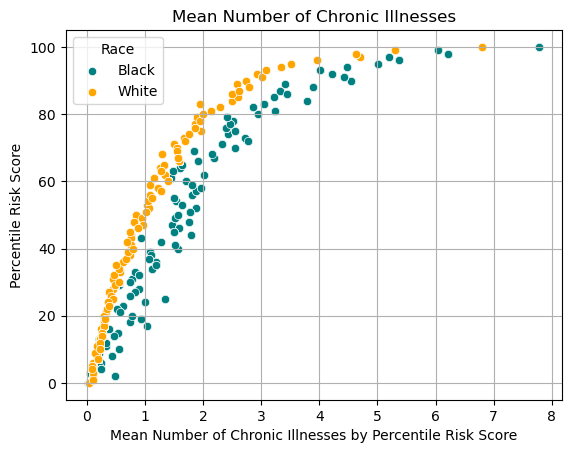

In [5]:

sns.scatterplot(x='meanCCblack', y='risk_percentile', data=blackDF, color='teal', label='Black')
sns.scatterplot(x='meanCCwhite', y='risk_percentile', data=whiteDF, color='orange', label='White')

plt.xlabel('Mean Number of Chronic Illnesses by Percentile Risk Score')
plt.ylabel('Percentile Risk Score')
plt.title('Mean Number of Chronic Illnesses')
plt.legend(title='Race')
plt.grid(True)
plt.show()

As we see from the plot, Patient A and Patient B are not equally likely to be referred to the high-risk care management program. Given the same number of active chronic conditions, white patients tend to score higher risk scores compared to their black counterparts. Thus white patients, such as patient A would be more likely to be referred to the high-risk care management program than black patients such as patient B. As Obermeyer et al said, "less-healthy Blacks scored at similar risk scores to more-healthy Whites" and thus there is evidence for "substantial disparities" in the program. 



### PART C: Reproducing Figure 3

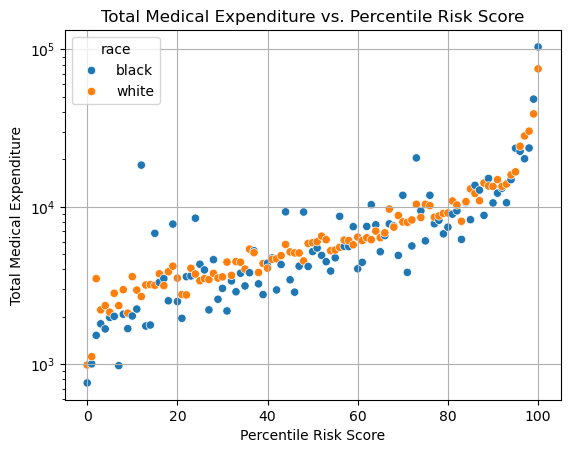

In [5]:
df['risk_percentile'] = (df['risk_score_t'].rank(pct=True) * 100).round()
riskCostDF = df.groupby(['risk_percentile','race']).aggregate({'cost_t': 'mean'}).reset_index()



sns.scatterplot(x='risk_percentile', y='cost_t', hue = 'race', data=riskCostDF)
plt.xlabel('Percentile Risk Score')
plt.ylabel('Total Medical Expenditure')
plt.title('Total Medical Expenditure vs. Percentile Risk Score')
plt.grid(True)
plt.yscale('log')
plt.show()

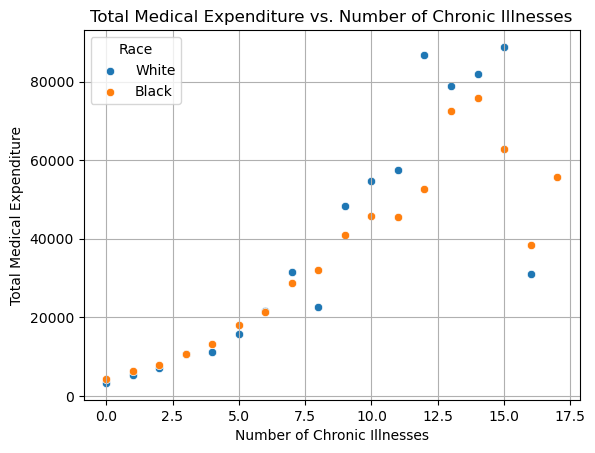

In [292]:
blackDF = df[df["race"] == "black"].copy()
whiteDF = df[df["race"] == "white"].copy()

chronicCostBlack = blackDF.groupby('gagne_sum_t')['cost_t'].mean().reset_index()
chronicCostWhite = whiteDF.groupby('gagne_sum_t')['cost_t'].mean().reset_index()

sns.scatterplot(x='gagne_sum_t', y='cost_t', data=chronicCostBlack, label ="White")
sns.scatterplot(x='gagne_sum_t', y='cost_t', data=chronicCostWhite, label ="Black")
plt.xlabel('Number of Chronic Illnesses')
plt.ylabel('Total Medical Expenditure')
plt.title('Total Medical Expenditure vs. Number of Chronic Illnesses')
plt.legend(title='Race')
plt.grid(True)
plt.show()

From the reproduction of these two figures, we can better understand our data. We note that a vast majority of patients in this data set have 5 or fewer chronic conditions. A surprising finding that there exists more disparity in health conditional risk than in costs. However, black patients have lower costs on average than their white patient counterparts, potentially suggesting they are not getting the care they need. To accurately predict costs for patients, their race is crucial information as it distinguishes their predicted costs, this suggests that the relationship between the number of chronic conditions and the cost might be nonlinear.

### PART D: Modeling Cost Disparity

In [9]:
CostDisparityDF = df[df['gagne_sum_t'] <= 5]
fiveChronics = CostDisparityDF.shape[0]
totalPatientsNum = df.shape[0]
percentFiveChronics = (fiveChronics / totalPatientsNum) * 100

About 95 percent of patients have five or less chronic conditions. Since this is the vast majority of patients, it is justified to focus in on these patients

In [12]:
CostDisparityDF = CostDisparityDF[CostDisparityDF['cost_t'] > 0]
CostDisparityDF['logCost'] = np.log(CostDisparityDF['cost_t'])

CostDisparityDF['OneHotRace'] = (CostDisparityDF['race'] == 'black').astype(int)

#separate into predictor variables and target variable 
predictorX = CostDisparityDF[['OneHotRace', 'gagne_sum_t']]
targetY = CostDisparityDF['logCost']



In [13]:
targetY

0        7.090077
1        7.863267
2        6.214608
3        7.170120
4        7.003065
           ...   
48779    6.684612
48780    7.696213
48781    6.684612
48782    7.170120
48783    8.389360
Name: logCost, Length: 44748, dtype: float64

As indicated in the findings from my figures above, the relationship between the number of chronic conditions and the cost might be nonlinear. Thus in order to fit a linear regression model, we must fit the model with a certain number of polynomial features of active chronic condition in order to to account for the nonlinearity. To determine how many polynomial features should be used for best predictions on this data set, cross validation is needed to test various data sets with differing number of polynomial feature sizes. For each possible polynomial feature size, a LinearRegression model is constructed a cross validation score is computed. 

In [17]:
def add_polynomial_features(X, degree):
  X_ = X.copy()
  for j in range(1, degree):
    X_[f"poly_{j}"] = X_["gagne_sum_t"]**j
  return X_

In [19]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import cross_val_score
#test each num of active chronic conditions 
cvScores = []

for degree in range (1,6):
    X_poly = add_polynomial_features(predictorX, degree)
    modelToEvaluate = LR()
    scores = cross_val_score(modelToEvaluate, X_poly, targetY, cv=5, scoring='explained_variance')
    cvScores.append(np.mean(scores))

    modelToEvaluate.fit(X_poly, targetY)

In [281]:
cvScores

[0.08547350567418092,
 0.0854752316405665,
 0.0862993008389995,
 0.08704835621632338,
 0.08740844467965052]

In [20]:
#fit the one that is best 
predictorX = add_polynomial_features(predictorX,6)
finalModel = LR()
finalModel.fit(predictorX, targetY)
finalModel.coef_

array([-0.2827181 ,  0.5939195 ,  0.5939195 , -1.28588299,  0.65937337,
       -0.14306628,  0.01107307])

Once the size of the polynomial feature that is most resonable for this dataset is determined, I fit one last linear regression model with the correct number of polynomial features, which in this case, is all 5. 

In [22]:
costIncurred = np.exp(finalModel.coef_[0])
costIncurred
#0.75

0.7537322331638742

Finally, e^W(b) is computed, which represents the cost incurred by black patients as a percentage of white patients. We find this number to be 0.75, which means that black patients incur 75% of the cost that white patients incur. This finding does indeed roughly support the argument of Obermeyer et al. (2019), as Obermeyer et al. claimed that there were opportunites for a disparity wedge to occur between needing health care and receiving health care, claiming that this disparity wedge was found to be correlated with race. Our findings indicate the same thing, since the interpretation of our 75% cost incurred figure could mean that a black patient with the same amount of chronic illnesses as a white patient would be paying less (and thus assumed to be receiving less needed healthcare). 

### Part E: Discussion 

Throughout this exploratory analysis that aimed to replicate the primary findings of Obermeyer et al. in their study of 'Dissecting racial bias in an algorithm used to manage the health of populations' (2019), we find similar results and conclusions. By contructing plot figures and linear regression models, I learned that there does indeed exists a disparity between both the attributed risk score and the medical costs incurred of the patients by race. The risk score of white patients are higher than their black patient counterparts who have the same number of chronic illnesses. The costs follow a similar pattern, bBlack patients incurring approximately 75% of the costs that white patients incur, where both sets of patient counterparts have the same number of chronic illnesses.  These finding suggest that black patients are not getting the health care they need, as they are deprioritized with lower risk scores and receiving less needed healthcare as they take on less medical costs. The importance of constructing a linear regression model with the proper number of polynomial features was emphasized in this analysis. Additionally, I gained an appreciation for extrapolating findings beyond their face value. Black patients incur less medical costs than their white counterparts with the same number of chronic illnesses. Why? Perhaps because they are not receiving the full extent of the healthcare they need and are thus paying less medical costs. 

 What aspects of the study support your answer?

Of the three statistical discrimation criteria discussed in Chapter 3 of Barocas, Hardt, and Narayanan (2023)- error rate parity, acceptance rate parity/independence, and sufficiency (calibration), the criteria that best describes the purported bias of the algorithm studied by Obermeyer et al. (2019) is error rate parity. I believe that error rate parity best describes the purported bias of the algorithm because the algorithm systematically assigns lower risk scores to black patients compared to white patients with the same number of chronic illnesses which can/does lead to unequal treatment and resource allocation in healthcare. The aspects of the study that support my answer is Obermeyer et al.'s commentary that this bias is "attributable to label choice—the difference between some unobserved optimal prediction and the prediction of an algorithm trained on an observed label". They claim that labels can be often measured in an error-prone way that reflect structural inequalities. This model has a problem with error rate parity as it does not make errors at similar rates for different groups to ensure fairness.
